<a href="https://colab.research.google.com/github/sukhmani1303/AIML-A2Z/blob/main/EDA-for-ML/eda4ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Introduction**
---

![](https://drive.google.com/uc?export=view&id=1FXKJxPDDHRL7aKUuZ-htp6IogPloVTst)

---
<br>

## **What is AI ?** 

* ##### A program that can sense, adapt, read & act on its own. In short, anything that has an intelligence of its own.
---
<br>

## **What is ML ?** 
* ##### Its a subset of AI which focusses on various Algorithms which help in machine's learning as more data gets fed/exposed to it.
---
<br>

## **What is Deep Learning ?** 
* ##### Its a subset of ML where "*Multi-Layered Neural Networks*" are used to learn from huge amounts of data.
---
<br>

## **Features Vs. Target** 
* ##### Features are the columns from where the data is studied for prediction.
* ##### Target, also known as "*label*" is/are the column(s) to be predicted.
---
<br>

## **Supervised Vs. Unsupervised Learning** 
* ##### Supervised Learning technique make use of "*labelled*" data for mainly **predictions using regressions or classification** algorithms. Example: Fraud Detection.
* ##### Unsupervised Learning teachnique makes use "*unlabelled*" data for mainly **finding patterns or understanding the structure of data**. Example: Customer Segmentation.







# **Retrieving Information**



### **From a CSV File**

In [ ]:
# using pandas library of python we can read csv data into a Dataframe
import pandas as pd

filepath = "path/of/the/file.csv"

# importing the data using read_csv() function

df_main = pd.read_csv(filepath)

# We can pass different attributes into read_csv() function :

sep = "\t" # This sets the separation by a tab rather than "," (for .tsv files)
header = None # This excludes the first row from our data from being exported
names = ['column1', 'column2', 'column3'] # This specifies the only columns to be used
na_values = ["NA","NAN", 99] # to set custom Null values to specified values

# to save the dataframe as csv
df_main.to_csv("new/path/of/file.csv" ,index = False)

### **From a JSON File**

In [ ]:
import pandas as pd

filepath = "path/of/the/file.json"

df_main = pd.read_json(filepath)

df_main.to_json("new/path/of/file.json")

# **Data Cleaning**

* **Too much Data** - This becomes a data engineering problem as it first 
need to be organised & distributed before using it for ML

* **Lack of Data** - ML algorithms need data to learn & this might lead to underfitting.

* **Bad Data** - Garbage in - Garbage out

* **Messy Data** 

  1.   Duplicate or unnecessary data
  2.   Inconsistent text & typos
  3.   Missing Data
  4.   Outliers
  5.   Data Sourcing issues











## **Missing Data**

  1.   *Remove* the data ( rows or columns -> depends in nature & amount of data missing )
  2.   *Impute* the data -> replace with standard data (mean, mode, median or any complex value)
  3.   *Mask* the data -> using the missing info as important info for algorithm (using as a separate category)



## **Otliners**
* ###### The Observation which is distinct from most observation. These are just observations which does not accurately represent the phenomenon we are trying to explain through model.

* ###### Not removing the outliners can have a significant impact, but some outliners are informative

## **How to find outliners ?**

* ### **Plots**
  1.   Histogram
  2.   Density
  3.   Box

* ### **Statistics**
  1.   Interquartile Range
  2.   Standard Deviation




In [ ]:
# plotting a histogram using seaborn
import seaborn as sns

sns.distplot(data, bins = 20)

In [ ]:
# plotting a box plot using seaborn
import seaborn as sns

sns.boxplot(data)

In [ ]:
# Mathematical methods for finding Outliners

import numpy as np

#getting the 25th, 50th & 75th quartile ranges :
q25, q50, q75 = np.percentile(data, [25,50,75])

#getting the interquartile range
iqr = q75 - q50

#calculating the min & max limits to be considered as an outliner
min = q25 - 1.5*(1qr)
max = q75 + 1.5*(1qr)

print(min, q25, q50, q75, max)

# identify the Outliners :
outliners = [x for x in data['columns'] if x>max]


## **Residuals**
###### (*represent model failure*)
###### differences between actual & predicted values of the ourcome variable.

*   **Standardized** - residual divided by standard error
*   **Deleted** - delete the residual observation & retrain
*   **Studentized** - deleted residuals are standardized



In [7]:
import pandas as pd
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
data = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv",names = CSV_COLUMN_NAMES, header = 0)
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [8]:
import matplotlib.pyplot as plt


# **Visualizations**

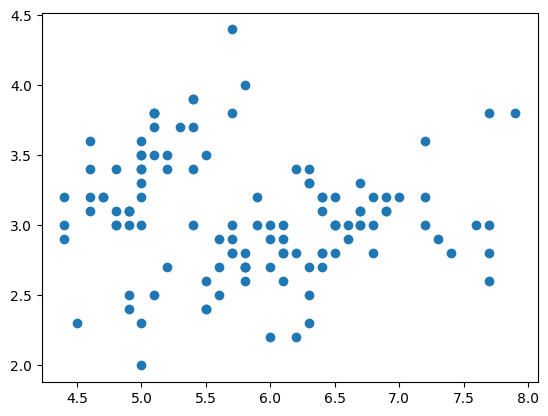

In [12]:
# Basic Scatter Plots

plt.plot(data.SepalLength, data.SepalWidth, ls = '', marker = 'o')

(array([ 4.,  4.,  6.,  6., 16.,  3.,  1.,  9.,  3., 12.,  2.,  4.,  8.,
         6.,  6.,  7.,  5.,  6.,  1.,  3.,  1.,  1.,  1.,  4.,  1.]),
 array([4.4 , 4.54, 4.68, 4.82, 4.96, 5.1 , 5.24, 5.38, 5.52, 5.66, 5.8 ,
        5.94, 6.08, 6.22, 6.36, 6.5 , 6.64, 6.78, 6.92, 7.06, 7.2 , 7.34,
        7.48, 7.62, 7.76, 7.9 ]),
 <BarContainer object of 25 artists>)

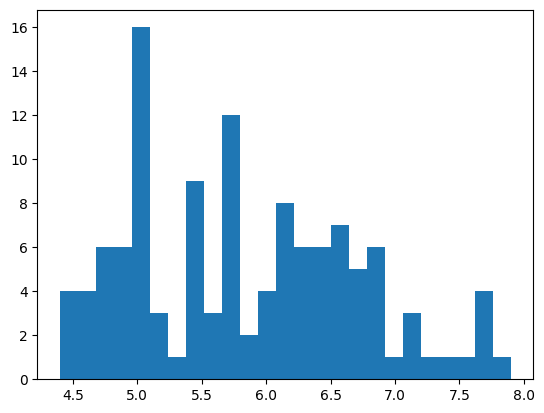

In [15]:
# histogram :

plt.hist(data.SepalLength, bins = 25)


<Axes: xlabel='Species'>

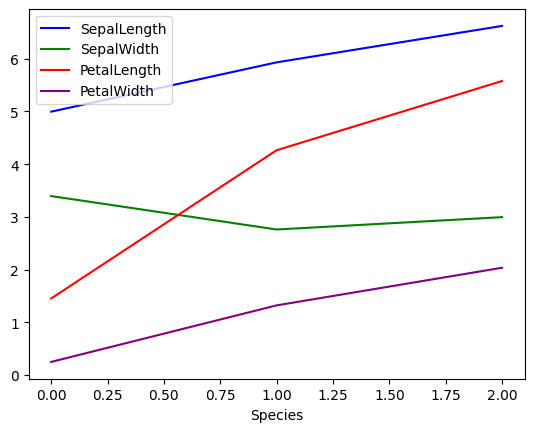

In [16]:
# Plotting using Group

data.groupby("Species").mean().plot(color = ['blue','green','red','purple'])

In [ ]:
# seaborn visualization by pairplot 
import seaborn as sns
sns.pairplot(data, hue = "Species", size = 3)

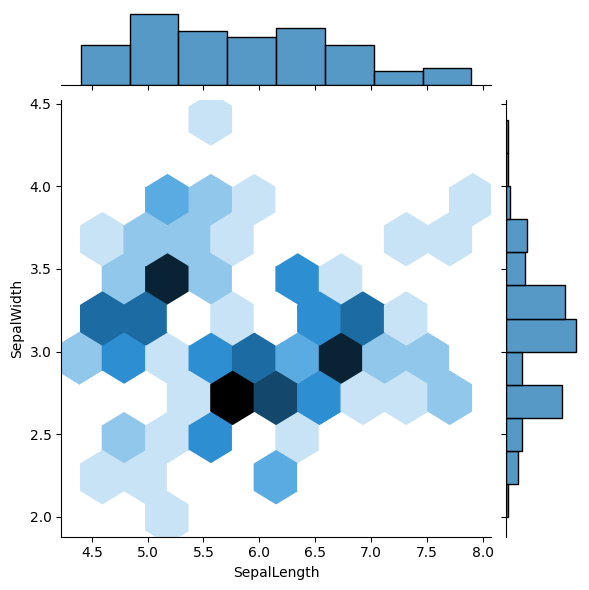

In [20]:
# using hex plot
sns.jointplot(x = data['SepalLength'], y = data["SepalWidth"], kind = "hex")

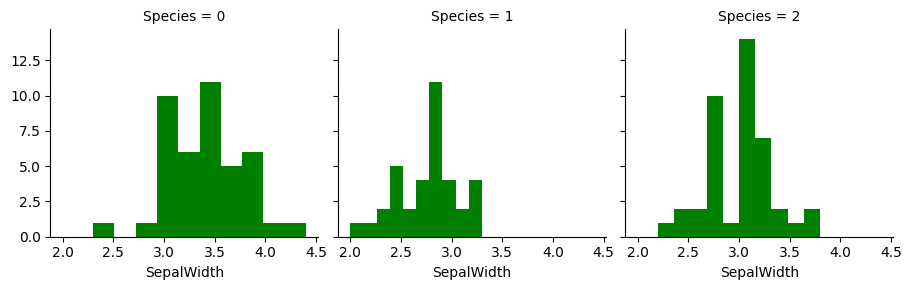

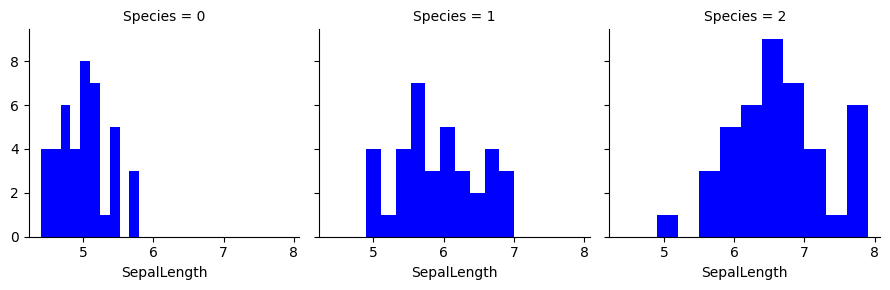

In [21]:
# Facet Grid
plot = sns.FacetGrid(data, col = 'Species', margin_titles = True)
plot.map(plt.hist, 'SepalWidth', color = 'green')
plot = sns.FacetGrid(data, col = 'Species', margin_titles = True)
plot.map(plt.hist, 'SepalLength', color = 'blue')

## **Feature Engineering**